In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import joblib

In [2]:
# Download necessary nltk data
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/siddhant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load the datasets 
url = 'https://raw.githubusercontent.com/siddhantbhattarai/AI-DataScience-BootCamp/main/SMSSpamCollection'
df = pd.read_csv(url, sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Checking the missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
# Checking the duplicated values
df.duplicated().sum()

403

In [6]:
df.drop_duplicates()
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.duplicated().sum()

403

In [8]:
# Basics statistics of the datasets 
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
# Count the spam vs ham message
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

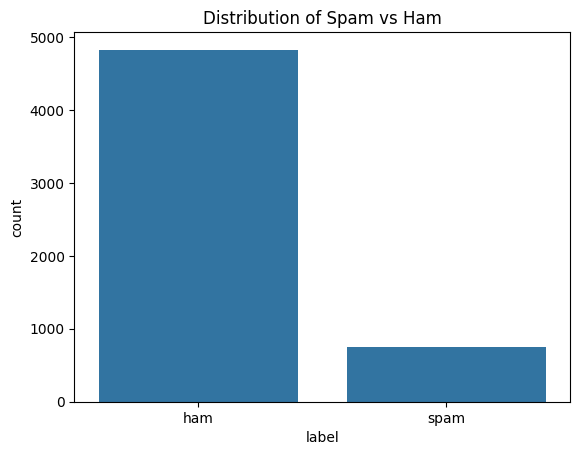

In [10]:
# Visualization: Distribution of spam vs ham messages
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham')
plt.show()

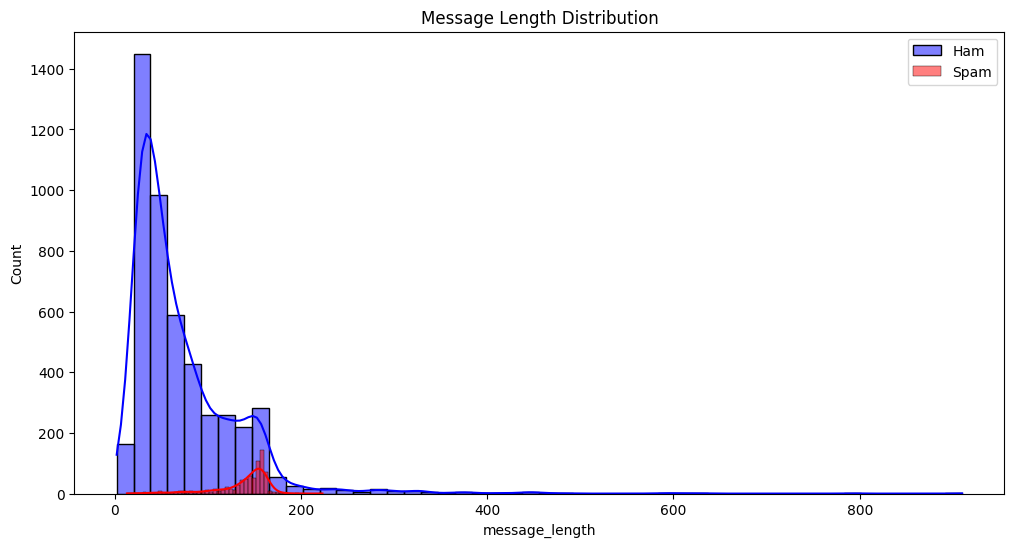

In [11]:
# Visualize the message length 
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 'ham']['message_length'], label='Ham', color='blue', bins=50, kde=True)
sns.histplot(df[df['label'] == 'spam']['message_length'], label='Spam', color='red', bins=50, kde=True)
plt.title('Message Length Distribution')
plt.legend()
plt.show()

In [12]:
# Visualization: Word Clouds for spam and ham messages
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
ham_words = ' '.join(df[df['label'] == 'ham']['message'])

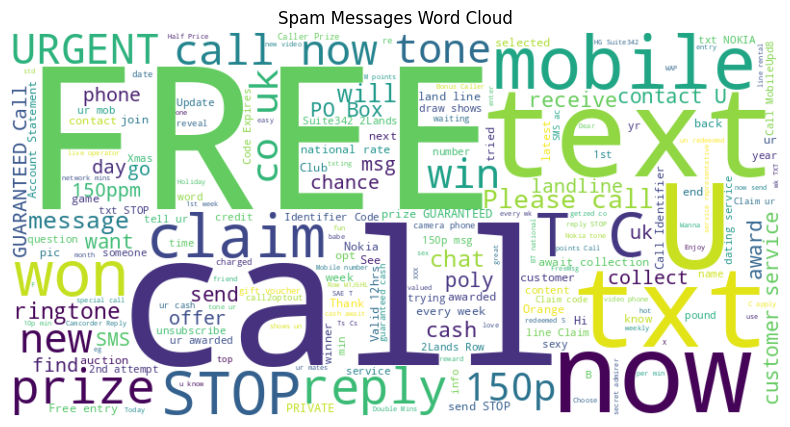

In [13]:
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

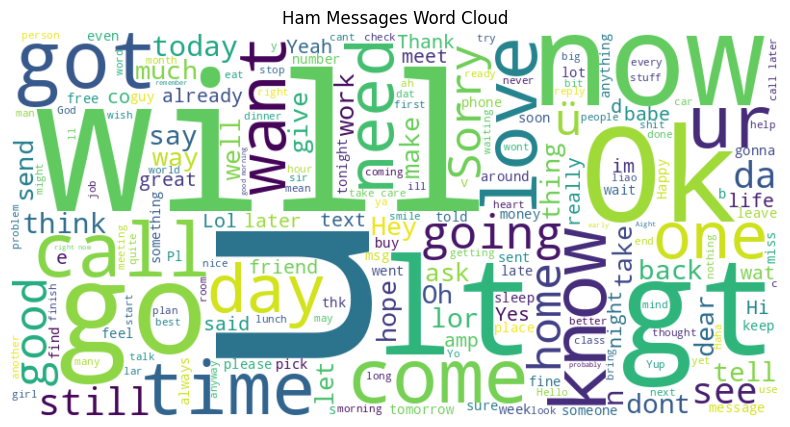

In [14]:
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

In [15]:
# EDA: Tokenization and common words analysis
df['tokens'] = df['message'].apply(word_tokenize)
spam_tokens = [token for sublist in df[df['label'] == 'spam']['tokens'] for token in sublist]
ham_tokens = [token for sublist in df[df['label'] == 'ham']['tokens'] for token in sublist]

In [16]:
spam_common_words = Counter(spam_tokens).most_common(20)
ham_common_words = Counter(ham_tokens).most_common(20)

In [17]:
spam_common_df = pd.DataFrame(spam_common_words, columns=['word', 'count'])
ham_common_df = pd.DataFrame(ham_common_words, columns=['word', 'count'])

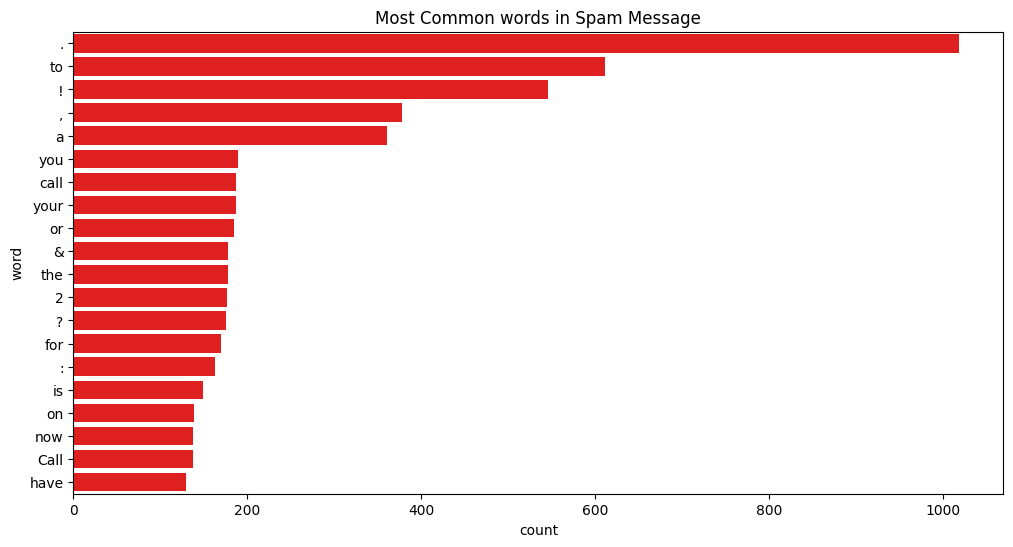

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=spam_common_df, color='red')
plt.title('Most Common words in Spam Message')
plt.show()

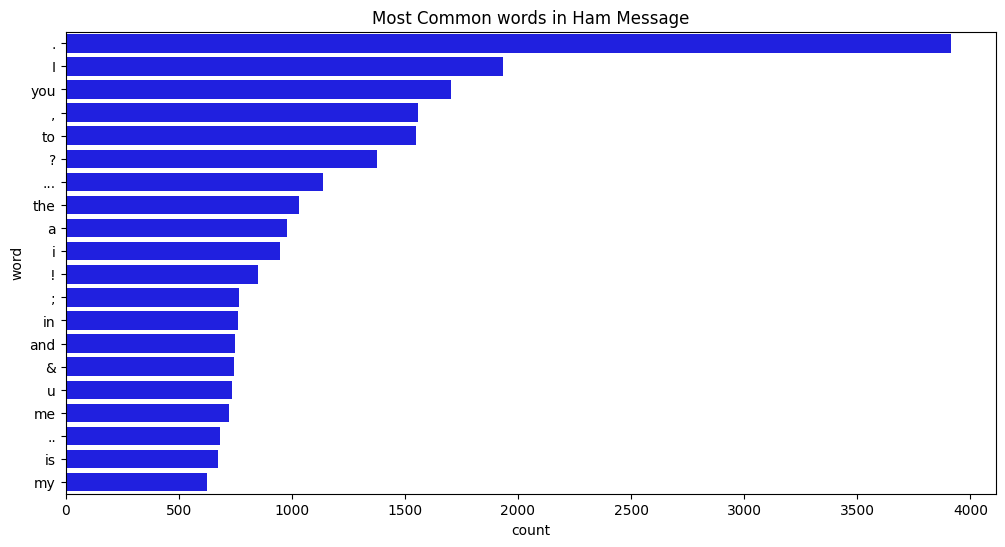

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=ham_common_df, color='blue')
plt.title('Most Common words in Ham Message')
plt.show()

In [20]:
# Data Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(text.split())
    return text

df['message'] = df['message'].apply(clean_text)

In [21]:
# Data Preprocessing
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [23]:
# Feature Engineering: Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
# Model Selection and Training 
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
# Linear SVC 
svc_model = LinearSVC(dual=False)
svc_model.fit(X_train_tfidf, y_train)

LinearSVC(dual=False)

In [26]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [27]:
# Model Evaluation
nb_predictions = nb_model.predict(X_test_tfidf)
svc_predictions = svc_model.predict(X_test_tfidf)
rf_predictions = rf_model.predict(X_test_tfidf)

# Accuracy computation
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(y_test, nb_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracy
print(f'Multinomial Naive Bayes Accuracy: {nb_accuracy*100:.2f}%')
print(f'Support Vector Classifier Accuracy: {svc_accuracy*100:.2f}%')
print(f'Random Forest Classifier Accuracy: {rf_accuracy*100:.2f}%')

Multinomial Naive Bayes Accuracy: 95.78%
Support Vector Classifier Accuracy: 98.74%
Random Forest Classifier Accuracy: 97.85%


In [28]:
# Save the model to a file
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
model_file_path = 'svc_model.pkl'
with open(model_file_path, 'wb') as f:
    pickle.dump(svc_model, f)
model_file_path

'svc_model.pkl'

In [29]:
# Save the model to a file
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
model_file_path = 'tfidf_vectorizer.pkl'
with open(model_file_path, 'wb') as f:
    pickle.dump(vectorizer, f)
model_file_path

'tfidf_vectorizer.pkl'

**Flask Application**

In [30]:
from flask import Flask, request, jsonify, render_template
import joblib
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
app = Flask(__name__)

In [ ]:
# Load the model and vectorizer
